In [1]:
import pandas as pd

In [2]:
import numpy as np

In [ ]:
dtype_dict = {
    "fare_amount": "float32",
    "pickup_longitude": "float32",
    "pickup_latitude": "float32",
    "dropoff_longitude": "float32",
    "dropoff_latitude": "float32",
    "passenger_count": "int8"
}

In [ ]:
# 데이터 불러오기
file_path = "C://Users/302-24/Downloads/new-york-city-taxi-fare-prediction/train.csv"
df = pd.read_csv(file_path, dtype=dtype_dict)

In [12]:
print(df.head())

                             key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3       

In [11]:
print(df.info())  # 메모리 사용량 줄어든 것 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB
None


In [13]:
print(df.shape)  # (행 개수, 열 개수)

(55423856, 8)


In [50]:
# 랜덤하게 50,000개 샘플링

df_sample = df.sample(n=10000, random_state=42)
print(df_sample.shape)

(10000, 9)


In [51]:
# 결측치 확인 및 처리
print(df_sample.isnull().sum())

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count        0
trip_distance_miles    0
dtype: int64


In [17]:
# 결측치가 있는 행 제거 (필요하면 다른 방법 사용 가능)

In [52]:
df = df_sample.dropna()

In [53]:
# 결측치 확인 및 처리
print(df_sample.isnull().sum())

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count        0
trip_distance_miles    0
dtype: int64


In [25]:
# 데이터 타입 변환 (날짜)
if 'pickup_datetime' in df_sample.columns:
    df['pickup_datetime'] = pd.to_datetime(df_sample['pickup_datetime'])

In [54]:
# 요금 이상치 제거 (0 이하 또는 너무 높은 값)
df_sample = df_sample[(df_sample["fare_amount"] > 0) & (df_sample["fare_amount"] < 500)]

# 승객 수 이상치 제거
df_sample = df_sample[(df_sample["passenger_count"] > 0) & (df_sample["passenger_count"] < 10)]

In [55]:
# 필요한 컬럼 추출

lat1 = df_sample["pickup_latitude"]
lon1 = df_sample["pickup_longitude"]
lat2 = df_sample["dropoff_latitude"]
lon2 = df_sample["dropoff_longitude"]

In [56]:
import numpy as np

def haversine_np(lat1, lon1, lat2, lon2):
    R = 3959  # 지구 반지름 (마일)
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# 벡터 연산을 이용한 거리 계산
df_sample["trip_distance_miles"] = haversine_np(df_sample["pickup_latitude"].to_numpy(),
                                         df_sample["pickup_longitude"].to_numpy(),
                                         df_sample["dropoff_latitude"].to_numpy(),
                                         df_sample["dropoff_longitude"].to_numpy())

In [46]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----------------------- ---------------- 5.8/9.9 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 32.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 설정 (🚨 승객 수 제거)
X = df_sample[["trip_distance_miles"]]  # "거리"만 사용
y = df_sample["fare_amount"]

# -------------------------------------------
# ✅ 1️⃣ 사이킷런 (Linear Regression)
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 선형 회귀 결과 출력
print("📌 [사이킷런 Linear Regression 결과]")
print(f" - 기울기 (trip_distance_miles): {lr_model.coef_[0]:.4f}")
print(f" - 절편 (Intercept): {lr_model.intercept_:.4f}")
print()

# -------------------------------------------
# ✅ 2️⃣ OLS (최소제곱법)
# -------------------------------------------
X_with_const = sm.add_constant(X)  # 절편 추가
ols_model = sm.OLS(y, X_with_const).fit()

# OLS 결과 출력
print("📌 [OLS 회귀 분석 결과]")
print(ols_model.summary())


📌 [사이킷런 Linear Regression 결과]
 - 기울기 (trip_distance_miles): 0.0014
 - 절편 (Intercept): 11.2340

📌 [OLS 회귀 분석 결과]
                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.470
Date:                Tue, 18 Mar 2025   Prob (F-statistic):            0.00209
Time:                        17:36:20   Log-Likelihood:                -36826.
No. Observations:               10000   AIC:                         7.366e+04
Df Residuals:                    9998   BIC:                         7.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------

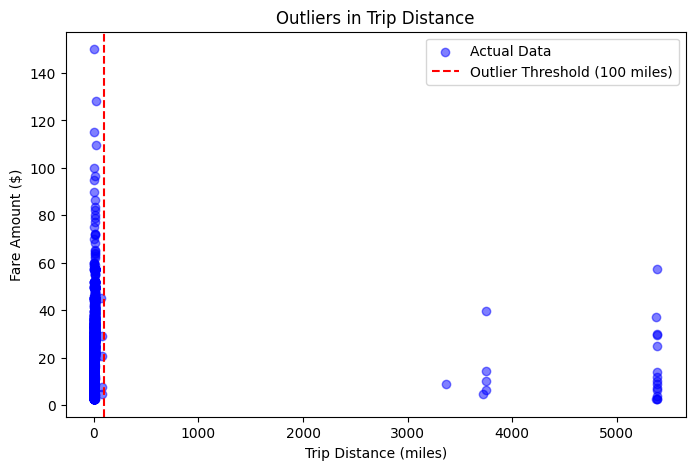

C:\Users\302-24\AppData\Local\Temp\ipykernel_7004\991477692.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["log_trip_distance"] = np.log1p(df_filtered["trip_distance_miles"])


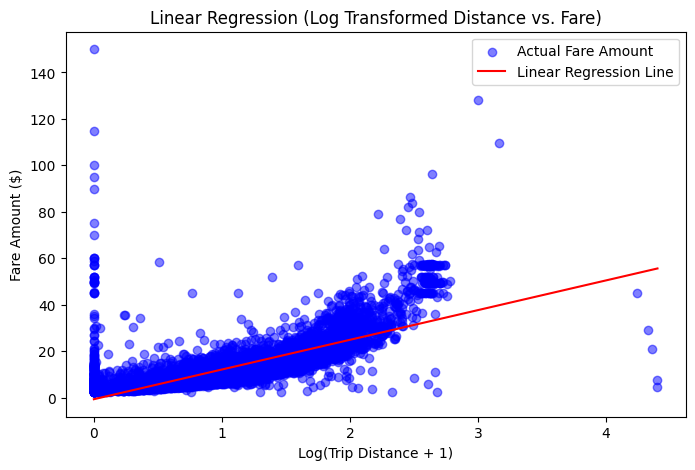

In [66]:
# 이상치 시각화 (100마일 이상인 데이터 확인)
plt.figure(figsize=(8, 5))
plt.scatter(df_sample["trip_distance_miles"], df_sample["fare_amount"], alpha=0.5, color="blue", label="Actual Data")
plt.axvline(x=100, color='red', linestyle='--', label="Outlier Threshold (100 miles)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Outliers in Trip Distance")
plt.legend()
plt.show()

# ✅ 2️⃣ 이상치 제거 (100마일 이상 제거)
df_filtered = df_sample[df_sample["trip_distance_miles"] < 100]

# ✅ 3️⃣ 로그 변환 적용 (거리 데이터가 한쪽에 몰려 있는 경우 개선)
df_filtered["log_trip_distance"] = np.log1p(df_filtered["trip_distance_miles"])

# ✅ 4️⃣ 선형 회귀 모델 학습 (로그 변환 거리 사용)
X_log = df_filtered[["log_trip_distance"]]  # 독립 변수: 로그 변환된 거리
y_log = df_filtered["fare_amount"]  # 종속 변수: 요금

lr_model_log = LinearRegression()
lr_model_log.fit(X_log, y_log)

# ✅ 5️⃣ 예측값 계산 (회귀선 그리기 위해)
y_pred_log = lr_model_log.predict(X_log)

# ✅ 6️⃣ 로그 변환된 거리 기반 그래프 그리기
plt.figure(figsize=(8, 5))

# 🔹 실제 데이터 (파란 점)
plt.scatter(X_log, y_log, alpha=0.5, label="Actual Fare Amount", color="blue")

# 🔹 선형 회귀선 (빨간 선)
sorted_indices = np.argsort(X_log.values.flatten())  # X값 정렬
plt.plot(X_log.values.flatten()[sorted_indices], y_pred_log[sorted_indices], color="red", label="Linear Regression Line")

# 🔹 그래프 꾸미기
plt.xlabel("Log(Trip Distance + 1)")
plt.ylabel("Fare Amount ($)")
plt.title("Linear Regression (Log Transformed Distance vs. Fare)")
plt.legend()

# ✅ 그래프 표시
plt.show()